<a href="https://colab.research.google.com/github/Esmreety/Image-Classification/blob/master/Transfer_Learning_With_Dropouts(using_Inception_Model's_mixed_7_layer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
from keras.optimizers import RMSprop
from keras.applications.inception_v3 import InceptionV3


Using TensorFlow backend.


In [3]:
weights_file = '/content/drive/My Drive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
                         input_shape =(150, 150, 3),
                          include_top = False,
                          weights = None)
pre_trained_model.load_weights(weights_file)
for layer in pre_trained_model.layers:
  layer.trainable = False #locking/freezing layer from retraining
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
_______________________________________________________________________________________

In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
#flatten output layer to 1 dimension
x = layers.Flatten()(last_output)
#Adding fully connected layers with 1024 hidden units and relu activation
x = layers.Dense(1024, activation = 'relu')(x)
#dropping out 20% of neurons
x = layers.Dropout(0.2)(x)
#output sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
             

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import backend as k
import numpy as np
from keras.preprocessing import image



In [7]:
train_data_dir = '/content/cats_and_dogs_filtered/train'
validation_data_dir = '/content/cats_and_dogs_filtered/validation'
batch_size = 20


In [8]:
train_datagen = ImageDataGenerator(
                     rescale = 1.0/255.,
                     rotation_range = 40, 
                     width_shift_range = 0.2,
                     height_shift_range = 0.2,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True,
                     fill_mode = 'nearest')
                    
              
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


In [9]:
train_generator = train_datagen.flow_from_directory(
                              train_data_dir,
                              target_size = (150,150),
                              batch_size = batch_size,
                                class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                                validation_data_dir,
                                target_size = (150,150),
                                batch_size = batch_size,
                                class_mode = 'binary')
                                                              

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    validation_data = validation_generator,
    verbose = 2,
    validation_steps = 50) 

Epoch 1/20
 - 33s - loss: 0.5219 - accuracy: 0.7495 - val_loss: 0.0783 - val_accuracy: 0.9550
Epoch 2/20
 - 22s - loss: 0.4081 - accuracy: 0.8165 - val_loss: 0.1162 - val_accuracy: 0.9620
Epoch 3/20
 - 22s - loss: 0.3579 - accuracy: 0.8485 - val_loss: 8.9862e-04 - val_accuracy: 0.9230
Epoch 4/20
 - 22s - loss: 0.3277 - accuracy: 0.8660 - val_loss: 0.8218 - val_accuracy: 0.9620
Epoch 5/20
 - 22s - loss: 0.3332 - accuracy: 0.8590 - val_loss: 1.0183 - val_accuracy: 0.9370
Epoch 6/20
 - 22s - loss: 0.2921 - accuracy: 0.8815 - val_loss: 0.0064 - val_accuracy: 0.9300
Epoch 7/20
 - 22s - loss: 0.3313 - accuracy: 0.8645 - val_loss: 0.5014 - val_accuracy: 0.9330
Epoch 8/20
 - 22s - loss: 0.3249 - accuracy: 0.8735 - val_loss: 1.7777 - val_accuracy: 0.9170
Epoch 9/20
 - 22s - loss: 0.3026 - accuracy: 0.8800 - val_loss: 0.0058 - val_accuracy: 0.9150
Epoch 10/20
 - 22s - loss: 0.2685 - accuracy: 0.8845 - val_loss: 0.1617 - val_accuracy: 0.9490
Epoch 11/20
 - 22s - loss: 0.2927 - accuracy: 0.8800 - 

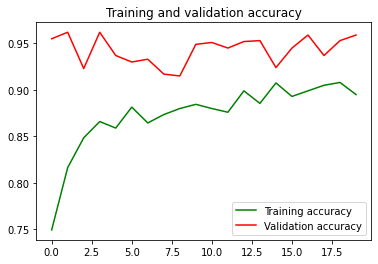

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()